In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook', palette='deep',
        font_scale=2, rc={'figure.figsize': [8, 8]})
from scipy.stats import beta
import numpy as np


0.101890238689 -0.0413944962039 0.2526165486


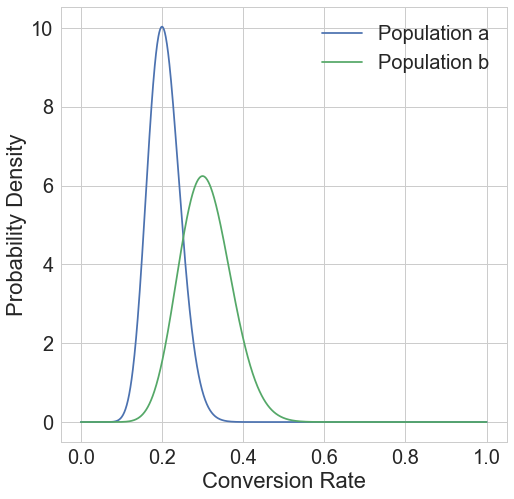

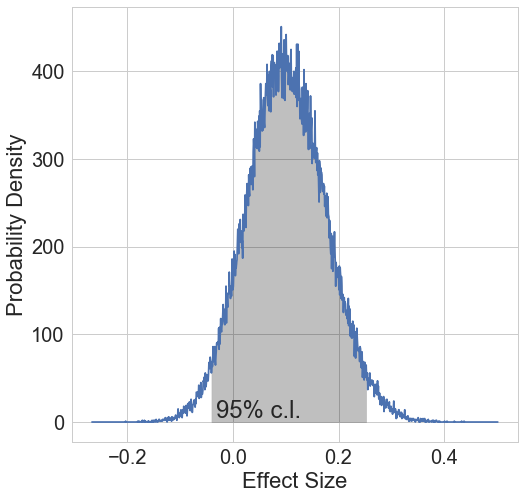

In [3]:
prior = (0, 0)
a = (100, 20)
b = (50, 15)

a_dist = beta(a[1] + prior[1] + 1, a[0] - a[1] + prior[0] - prior[1] + 1)
b_dist = beta(b[1] + prior[1] + 1, b[0] - b[1] + prior[0] - prior[1] + 1)

x = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(1, 1) 
ax.plot(x, a_dist.pdf(x))
ax.plot(x, b_dist.pdf(x))
ax.set(xlabel='Conversion Rate', ylabel='Probability Density')
ax.legend(['Population a', 'Population b'])

n = 100000
cl = 0.95
effect_size = b_dist.rvs(n) - a_dist.rvs(n)
lower = np.percentile(effect_size, (1 - cl) / 2 * 100)
upper = np.percentile(effect_size, (1 - (1 - cl) / 2) * 100)
spread = max(effect_size) - min(effect_size)
β, bins = np.histogram(effect_size, 
                       bins=1000, 
                       range=(min(effect_size) - 0.1 * spread,
                              max(effect_size) + 0.1 * spread))
x = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(1, 1) 
ax.plot((bins[:-1] + bins[1:]) / 2, β)
ax.fill_between(x[(lower <= x) & (x <= upper)], 0, β[(lower <= x) & (x <= upper)], 
                color='k', alpha=.25)
ax.annotate('95% c.l.', (lower + 0.01, 5))
ax.set(xlabel='Effect Size', ylabel='Probability Density')

print(effect_size.mean(), lower, upper)